# Importing required libraries

In [57]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
#Database loading and pre-processing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Data preprocessing / EDA

In [59]:
kidney_dataframe = pd.read_csv("chronic_kidney_disease.csv")

print('Shape of dataset: ' + str(kidney_dataframe.shape))
print('Total number of data = ' + str(kidney_dataframe.shape[0]))
print('Total number of attributes  = ' + str(kidney_dataframe.shape[1]))

Shape of dataset: (400, 25)
Total number of data = 400
Total number of attributes  = 25


In [60]:
kidney_dataframe = kidney_dataframe.replace('?', np.nan)
    
#set the features and the target variables
target_class = kidney_dataframe['class']

feature_classes = kidney_dataframe.iloc[:, 0:24]
    
    
knn_missing_values_imputer = KNNImputer(n_neighbors=3)
feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)

    
    
#Scaling 
standard_scaler = StandardScaler()
feature_classes = standard_scaler.fit_transform(feature_classes)
feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane']) 
#Encoding target class 
target_encoder = preprocessing.LabelEncoder()
target_class = target_encoder.fit_transform(target_class)
target_class1 = pd.DataFrame(target_class, columns=['class'])  #0 for kidney disease , 1 for no ckd


    


In [61]:
#target_class1

In [62]:
kidney_dataframe.head() 

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,NaN,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,...,35,7300,4.6,1,1,1,1,1,1,ckd


In [63]:
kidney_dataframe.describe()

,rbc,pc,pcc,ba,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.117500,0.190000,0.885000,0.935000,31.982500,6178.500000,3.16575,0.627500,0.645000,0.905000,0.792500,0.807500,0.847500
std,0.322418,0.392792,0.319421,0.246835,16.962799,4490.489839,2.36621,0.484076,0.479113,0.293582,0.406024,0.394757,0.359955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,26.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,37.000000,6900.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000,44.000000,9400.000000,5.10000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,54.000000,26400.000000,8.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
kidney_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    object 
 1   bp      388 non-null    object 
 2   sg      353 non-null    object 
 3   al      354 non-null    object 
 4   su      351 non-null    object 
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     356 non-null    object 
 10  bu      381 non-null    object 
 11  sc      383 non-null    object 
 12  sod     313 non-null    object 
 13  pot     312 non-null    object 
 14  hemo    348 non-null    object 
 15  pcv     400 non-null    int64  
 16  wbcc    400 non-null    int64  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

# split the dataset

In [65]:

train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.7, test_size = 0.3,random_state=0)
print('\nAfter Pre-processing:')
print('Size of train dataset: ' + str(train_target.shape[0]))
print('Size of test dataset: ' + str(test_target.shape[0]))


After Pre-processing:
Size of train dataset: 280
Size of test dataset: 120


C:\Users\wasee\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


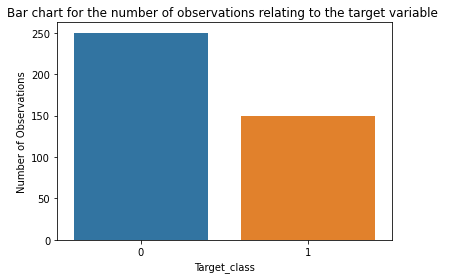

In [66]:
#Target class Visualisation
#0 - Kindney disease   ,1 - no disease
sns.countplot(pd.concat([feature_classes, target_class1], axis=1, sort=False)['class'], label = "Count")
plt.title('Bar chart for the number of observations relating to the target variable ')
plt.xlabel('Target_class')
plt.ylabel('Number of Observations')
plt.show()

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 5, 'splitter': 'best'}

The best model after gridsearch is:
 DecisionTreeClassifier(max_features='auto', min_samples_leaf=5, random_state=0)

Precision: 0.9574468085106383
Accuracy: 0.9583333333333334
Recall: 0.9375
F1-score: 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.96      0.94      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120


Confusion Matrix: 
[[70  2]
 [ 3 45]]


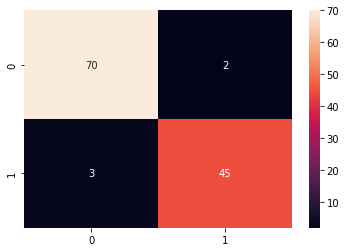

In [67]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


decision_tree_model = DecisionTreeClassifier(random_state = 0)


dt_parameters_grid = {'criterion': ['gini', 'entropy'], 
                      'splitter': ['best', 'random'], 
                      'min_samples_leaf': [1, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}


dt_grid_search = GridSearchCV(decision_tree_model, dt_parameters_grid, scoring = 'accuracy')

dt_grid_search.fit(train_features, train_target)


print('The best parameters are:\n ' +str(dt_grid_search.best_params_))


print('\nThe best model after gridsearch is:\n ' + str(dt_grid_search.best_estimator_))


dt_prediction = dt_grid_search.predict(test_features)


print('\nPrecision: ' + str(metrics.precision_score(test_target, dt_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, dt_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, dt_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, dt_prediction)))


print('\nClassification Report:\n' + str(metrics.classification_report(test_target, dt_prediction)))


print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, dt_prediction)))

sns.heatmap(metrics.confusion_matrix(test_target, dt_prediction), annot = True)
plt.show()

Best parameters :
 {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 2, 'weights': 'uniform'}

Best model after gridsearch:
 KNeighborsClassifier(n_jobs=1, n_neighbors=2)

Precision: 0.9787234042553191
Accuracy: 0.975
Recall: 0.9583333333333334
F1-score: 0.968421052631579

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.96      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120


Confusion Matrix: 
[[71  1]
 [ 2 46]]


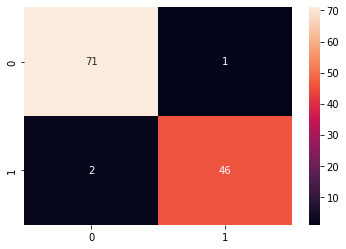

In [68]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

knn_model = KNeighborsClassifier()

knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                       'weights': ['uniform', 'distance'], 
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
                       'n_jobs':[1, -1]}


knn_grid_search = GridSearchCV(knn_model, knn_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
knn_grid_search.fit(train_features, train_target)

print('Best parameters :\n ' +str(knn_grid_search.best_params_))

print('\nBest model after gridsearch:\n ' + str(knn_grid_search.best_estimator_))


knn_prediction = knn_grid_search.predict(test_features)


print('\nPrecision: ' + str(metrics.precision_score(test_target, knn_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, knn_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, knn_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, knn_prediction)))


print('\nClassification Report:\n' + str(metrics.classification_report(test_target, knn_prediction)))


print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, knn_prediction)))

sns.heatmap(metrics.confusion_matrix(test_target, knn_prediction), annot = True)
plt.show()

In [69]:
test_features.head(20)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
132,-0.074372,1.495105,-1.013693,0.755031,1.457546,-0.364890,-0.484322,0.360477,0.263664,0.901042,...,-1.283127,-0.471178,1.565596,-0.197080,-1.297907,0.741881,0.323994,0.511693,-2.048122,-2.357409
309,-0.016117,-1.216544,0.497027,-0.788474,-0.436396,-0.364890,-0.484322,0.360477,0.263664,-0.266475,...,1.742618,0.473244,0.428440,1.156987,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195
341,0.682944,-0.477004,1.403459,-0.788474,-0.436396,-0.364890,-0.484322,0.360477,0.263664,-0.253502,...,0.405661,0.532270,0.250063,0.649212,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195
196,-0.132627,1.741618,-1.315838,1.526783,-0.436396,2.740554,2.064742,0.360477,0.263664,-0.266475,...,-1.459043,-0.471178,0.762898,0.141437,-1.297907,-1.347925,0.323994,-1.954297,-2.048122,-2.357409
246,-0.190883,2.481159,-0.409405,1.526783,-0.436396,2.740554,-0.484322,-2.774104,0.263664,-0.564840,...,-1.283127,-0.353125,-0.262772,-0.281709,-1.297907,0.741881,-3.086473,0.511693,0.488252,-2.357409
60,0.915964,1.002078,0.497027,-0.016721,-0.436396,-0.364890,2.064742,-2.774104,0.263664,-0.110806,...,-0.696742,-1.887811,-1.377631,-1.339575,-1.297907,0.741881,0.323994,0.511693,0.488252,0.424195
155,-0.074372,-0.477004,0.497027,1.526783,-0.436396,2.740554,-0.484322,-2.774104,-3.792706,-0.344309,...,-0.403550,0.237138,-0.329664,-1.339575,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195
261,-0.132627,0.262537,0.497027,-0.788474,-0.436396,-0.364890,-0.484322,0.360477,0.263664,-0.357282,...,1.672252,0.532270,-0.128989,0.733841,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195
141,0.915964,-0.477004,-1.315838,-0.016721,-0.436396,-0.364890,-0.484322,0.360477,0.263664,-0.724833,...,-2.162705,-0.766310,0.071685,-1.339575,-1.297907,0.741881,0.323994,0.511693,0.488252,-2.357409
214,0.974220,0.262537,-0.409405,-0.788474,-0.436396,-0.364890,2.064742,0.360477,0.263664,0.278366,...,0.511210,0.650323,-0.285069,0.860785,0.770471,-1.347925,0.323994,0.511693,0.488252,0.424195


In [88]:
ab=(test_features.loc[134]).values
b = np.asarray(ab)
b = b.reshape(1,-1)
d = knn_grid_search.predict(b)
d[0]
if d[0]==0:
    print("Person has kidney disease")
else:
    print("Great! person is fine!")

Person has kidney disease
